In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

data = np.zeros((1, len(columns)))

for file in ['../UCI_data/processed.va.csv', '../UCI_data/processed.switzerland.csv', 
             '../UCI_data/processed.cleveland.csv', '../UCI_data/processed.hungarian.csv']:
    data = np.vstack((data, np.genfromtxt(file, delimiter=',')))
data = data[1:]
df = pd.DataFrame(data=data, columns=columns, index=None)
df.to_csv('df.csv', sep='\t', index=False)

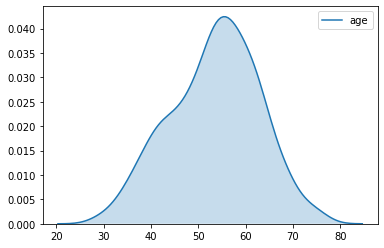

In [3]:
ax = sns.kdeplot(df['age'], shade=True)

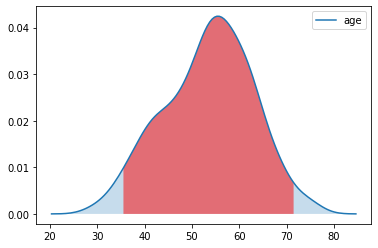

In [4]:
ax = sns.kdeplot(df['age'], shade=True)
x, y = ax.get_lines()[-1].get_data()

mu = np.mean(df['age'])
sigma = np.std(df['age'])
x1, x2 = (mu - (1.96*sigma), mu + (1.96*sigma))

ax.fill_between(x, y, alpha=0.5, facecolor='red', where = (x >= x1) & (x <= x2))
plt.show()

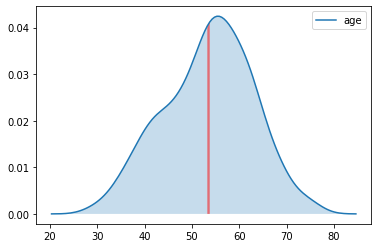

In [5]:
ax = sns.kdeplot(df['age'], shade=True)
x, y = ax.get_lines()[-1].get_data()

x1, x2 = st.t.interval(0.95, len(df['age'])-1, loc=np.mean(df['age']), scale=st.sem(df['age']))

ax.fill_between(x, y, alpha=0.5, facecolor='red', where = (x >= x1) & (x <= x2))
plt.show()

In [6]:
import numpy as np

def bootstrap(data, B=1000, theta='mean', alpha=0.95, method='all'):

    sample_size = len(data)
    
    if theta == 'mean':
        simulations = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for i in range(B)]
    
    elif theta == 'median':
        simulations = [np.median(np.random.choice(data, size=sample_size, replace=True)) for i in range(B)]
    
    simulations.sort()
    
    u_pval = (1 + alpha)/2
    l_pval = (1 - u_pval)
    
    if method == 'all':
        results = dict()
        results['basic'] = _basic(simulations=simulations, 
                                  l_pval=l_pval, 
                                  u_pval=u_pval, 
                                  B=B)
        results['percentile'] = _percentile(simulations=simulations, 
                                            l_pval=l_pval, 
                                            u_pval=u_pval)
        return results
    
    if method == 'basic':
        return _basic(simulations=simulations, 
                      l_pval=l_pval, 
                      u_pval=u_pval, 
                      B=B)
    
    elif method == 'percentile':
        return _percentile(simulations=simulations, 
                           l_pval=l_pval, 
                           u_pval=u_pval)

        
def _basic(simulations, l_pval, u_pval, B):
    
    lower = simulations[int(np.floor(B*l_pval))]
    upper = simulations[int(np.floor(B*u_pval))]
    
    return(lower, upper)

def _percentile(simulations, l_pval, u_pval):
    
    lower = np.percentile(simulations, l_pval*100)
    upper = np.percentile(simulations, u_pval*100)
    
    return(lower, upper)

In [7]:
results = bootstrap(data=df['age'])

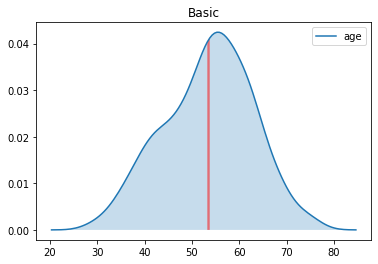

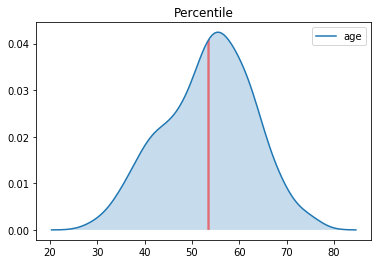

In [8]:
for i in results:
    ax = sns.kdeplot(df['age'], shade=True)
    x, y = ax.get_lines()[-1].get_data()
    
    x1, x2 = results[i]
    
    ax.fill_between(x, y, alpha=0.5, facecolor='red', where = (x >= x1) & (x <= x2))
    ax.set_title(i.title())
    plt.show()